In [210]:
import pandas as pd

ach_log_file = r"C:\Yahia\Home\Yahia-Dev\Python\training\xml\performance\SystemLog\SystemLog\Log10172021.txt"
timex = []
files = []
actions=[]
status = []
line_no = 1
with open(ach_log_file, 'rt') as f:
    while(True):
        line = f.readline()
        if not line:
            break
        
        try:
            x = line.split('::::')
            fdt_time = x[0] 
            action = x[1].split()[0]
        except:
            # print (line_no, 'error parsing action:', line)
            action = '***'
            fdt_time = ''

        ls = line.split('"')
        if len(ls) > 1:
            file_name = ls[1]
            ls = ls[2].split()
            download_status = ls[0] if len(ls) > 0 else ''
        else:
            file_name = ''
            download_status = ''
        # print(line_no, '- ', fdt_time, '----',action, '***', file_name)
        timex.append(fdt_time)
        files.append(file_name)
        actions.append(action)
        status.append(download_status)
        line_no += 1
        # timex.append(x)
        # time_str.append(ftime)
       

In [211]:
data1={ 'Time':timex,
        'File': files,
        'Action':actions,
        'Status': status
}
data = pd.DataFrame(data1)
data['Time'] = pd.to_datetime(data['Time'])

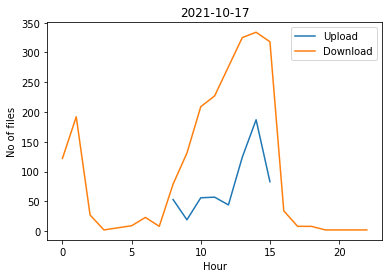

In [213]:
import matplotlib.pyplot as plt
d = data.loc [data['Action'] == 'Downloading']
d= d[d['Status'] == 'Completed']
d['Hour']= d['Time'].dt.hour 
x = d.groupby(['Hour']).count()['File']
d = pd.DataFrame(x)
d = d.rename(columns={'File':'Download'})

u = data.loc [data['Action'] == 'Uploading']
u= u[u['Status'] == 'Completed']
u['Hour']= u['Time'].dt.hour 
x = u.groupby(['Hour']).count()['File']
u = pd.DataFrame(x)
u=u.rename(columns={'File':'Upload'})
all = d.join(u, on='Hour')

all.plot( y=['Upload', 'Download'])
plt.ylabel('No of files')
data_date = data['Time'].dt.date.unique()[0]
plt.title (data_date)
plt.show()



In [216]:
import os
ach_log_dir = r"C:\Yahia\Home\Yahia-Dev\Python\training\xml\performance\SystemLog\SystemLog"
for f in os.listdir(ach_log_dir):
    with open(os.path.join(ach_log_dir,f), 'rt') as f:
        while(True):
            line = f.readline()
            if not line:
                break
            
            try:
                x = line.split('::::')
                fdt_time = x[0] 
                action = x[1].split()[0]
            except:
                # print (line_no, 'error parsing action:', line)
                action = '***'
                fdt_time = ''

            ls = line.split('"')
            if len(ls) > 1:
                file_name = ls[1]
                ls = ls[2].split()
                download_status = ls[0] if len(ls) > 0 else ''
            else:
                file_name = ''
                download_status = ''
            # print(line_no, '- ', fdt_time, '----',action, '***', file_name)
            timex.append(fdt_time)
            files.append(file_name)
            actions.append(action)
            status.append(download_status)
            line_no += 1

In [217]:
data1={ 'Time':timex,
        'File': files,
        'Action':actions,
        'Status': status
}
data = pd.DataFrame(data1)
data['Time'] = pd.to_datetime(data['Time'])

In [218]:
data.to_csv(r'.\out\ach_log_data_all.csv')

In [ ]:
data = pd.read_csv(r'.\out\ach_log_data_all.csv')

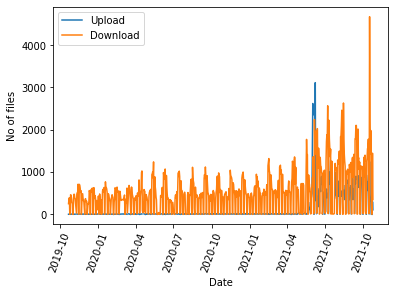

In [222]:
import matplotlib.pyplot as plt
d = data.loc [data['Action'] == 'Downloading']
d= d[d['Status'] == 'Completed']
d['Date']= d['Time'].dt.date 
x = d.groupby(['Date']).count()['File']
d = pd.DataFrame(x)
d = d.rename(columns={'File':'Download'})

u = data.loc [data['Action'] == 'Uploading']
u= u[u['Status'] == 'Completed']
u['Date']= u['Time'].dt.date 
x = u.groupby(['Date']).count()['File']
u = pd.DataFrame(x)
u=u.rename(columns={'File':'Upload'})
all = d.join(u, on='Date')

all.plot( y=['Upload', 'Download'])
plt.ylabel('No of files')
# data_date = data['Time'].dt.date.unique()[0]
plt.xticks(rotation = 70)
# plt.title (data_date)
plt.show()

In [247]:
all.head()
# one_month = all.loc[all['Date'].dt.month]# == '2021-09']
# all.columns
x = all.index
x = all.loc[x]
# all['Date']
x

,Download,Upload
Date,,
2019-10-22,255,4.0
2019-10-23,356,3.0
2019-10-24,394,5.0
2019-10-25,2,NaN
2019-10-27,465,4.0
...,...,...
2021-10-21,238,9.0
2021-10-22,3,NaN
2021-10-23,8,2.0
